# Search for Molecular Dynamics publications in PubMed

Results can be verified [here](https://pubmed.ncbi.nlm.nih.gov/?term=%22molecular+dynamics%22&filter=years.2000-2022&sort=date)

In [1]:
from Bio import Entrez
import matplotlib.pyplot as plt
import pandas as pd

Initiate Entrez module with proper e-mail address

In [2]:
Entrez.email = "bob@email.com"

Define function to query Pubmed per year

In [3]:
def query_pubmed(term="", year_start=2000, year_end=2021):
    years = []
    paper_count = []
    for year in range(year_start, year_end+1):
        query = (f'("{term}") AND '
                 f'("{year}/01/01"[Date - Publication] : "{year}/12/31"[Date - Publication])'
                )
        esearch_res = Entrez.read(Entrez.esearch(db="pubmed", term=query))
        years.append(year)
        paper_count.append(int(esearch_res["Count"]))
    return years, paper_count

In [4]:
years, papers = query_pubmed(term="molecular dynamics", year_start=2000, year_end=2021)
df_md = pd.DataFrame({"years": years, "papers": papers})
df_md.to_csv("number_of_MD_papers_per_year.tsv", sep="\t", index=False)

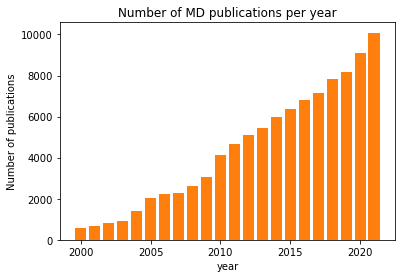

In [5]:
fig, ax = plt.subplots()
ax.bar(df_md["years"], df_md["papers"], color="C1")
ax.set_title("Number of MD publications per year")
ax.set_xlabel("year")
ax.set_ylabel("Number of publications")
fig.savefig("number_of_MD_papers_per_year.svg")

In [6]:
years, papers = query_pubmed(term="gromacs", year_start=2000, year_end=2021)
df_gromacs = pd.DataFrame({"years": years, "papers": papers})
df_gromacs.to_csv("number_of_gromacs_papers_per_year.tsv", sep="\t", index=False)

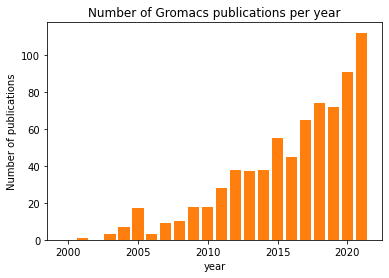

In [7]:
fig, ax = plt.subplots()
ax.bar(df_gromacs["years"], df_gromacs["papers"], color="C1")
ax.set_title("Number of Gromacs publications per year")
ax.set_xlabel("year")
ax.set_ylabel("Number of publications")
fig.savefig("number_of_gromacs_papers_per_year.svg")